### IMPORTING ALL THE NECCESARY LIBRARIES

In [100]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler

In [101]:
data = pd.read_csv("C:/Users/vinay/OneDrive/Desktop/Christ/SEM2/MACHINE LEARNING/DATASETS/boston housing/melb_data.csv")
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [103]:
data.shape

(13580, 21)

In [104]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [105]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [106]:
for i in data.columns:
    print("Column", i ,"has" ,np.round(((data[i].isnull().sum())/data.shape[0]*100),4),"%")

Column Suburb has 0.0 %
Column Address has 0.0 %
Column Rooms has 0.0 %
Column Type has 0.0 %
Column Price has 0.0 %
Column Method has 0.0 %
Column SellerG has 0.0 %
Column Date has 0.0 %
Column Distance has 0.0 %
Column Postcode has 0.0 %
Column Bedroom2 has 0.0 %
Column Bathroom has 0.0 %
Column Car has 0.4566 %
Column Landsize has 0.0 %
Column BuildingArea has 47.4963 %
Column YearBuilt has 39.5803 %
Column CouncilArea has 10.081 %
Column Lattitude has 0.0 %
Column Longtitude has 0.0 %
Column Regionname has 0.0 %
Column Propertycount has 0.0 %


array([[<AxesSubplot: title={'center': 'Car'}>]], dtype=object)

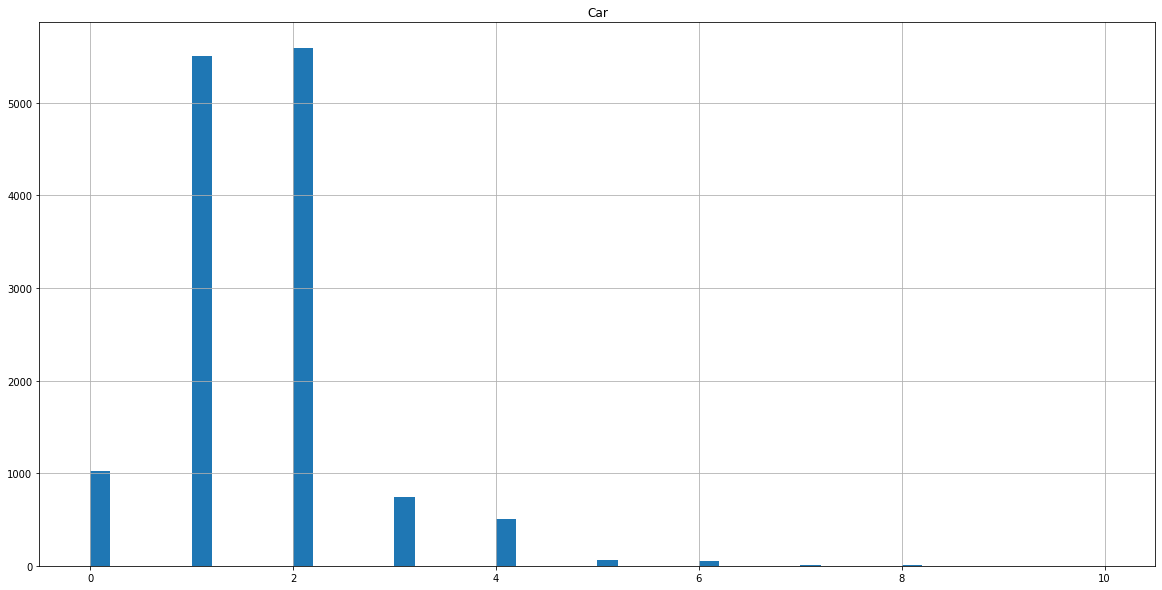

In [107]:
data.hist("Car" ,bins=50 ,figsize=(20,10))

In [108]:
data.dropna(subset = ["Car"],inplace=True)

In [109]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6417
YearBuilt        5344
CouncilArea      1307
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

array([[<AxesSubplot: title={'center': 'BuildingArea'}>]], dtype=object)

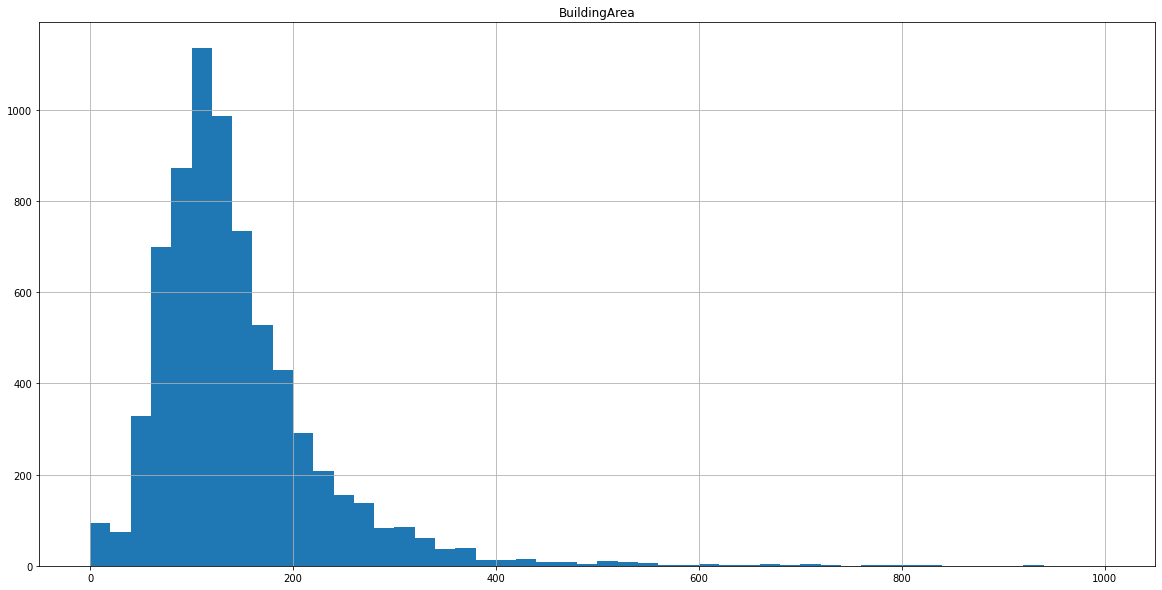

In [110]:
data.hist("BuildingArea",range =[0,1000],bins=50,figsize=(20,10))

In [111]:
mean_BuildingArea = data["BuildingArea"].mean()
data["BuildingArea"].bfill(inplace=True)

In [112]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5344
CouncilArea      1307
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

array([[<AxesSubplot: title={'center': 'BuildingArea'}>]], dtype=object)

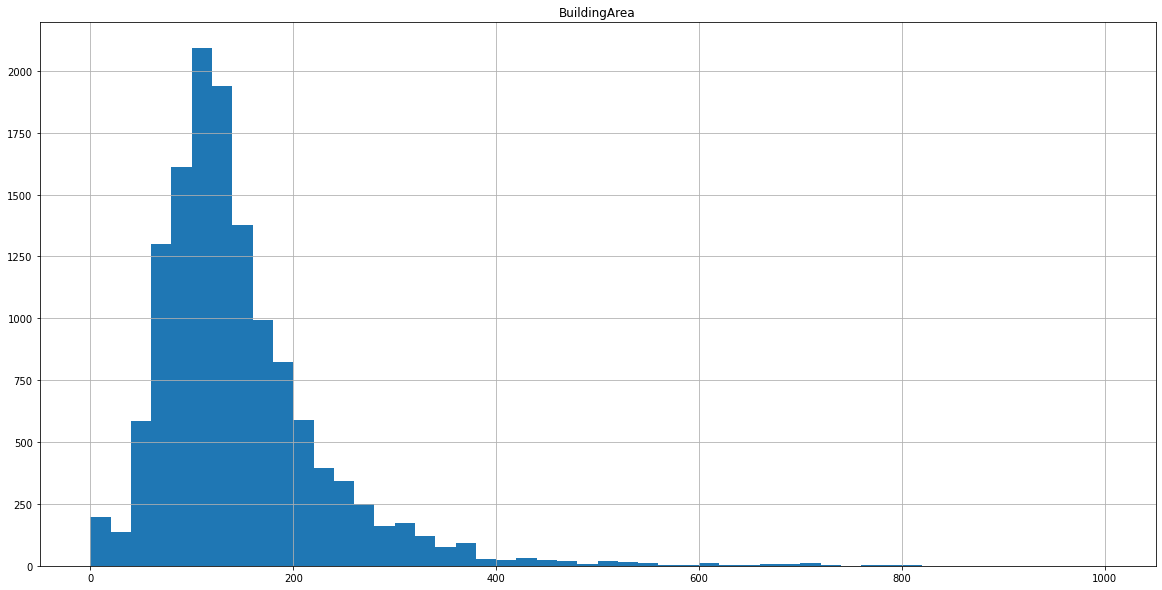

In [113]:
data.hist("BuildingArea",range =[0,1000],bins=50,figsize=(20,10))

array([[<AxesSubplot: title={'center': 'YearBuilt'}>]], dtype=object)

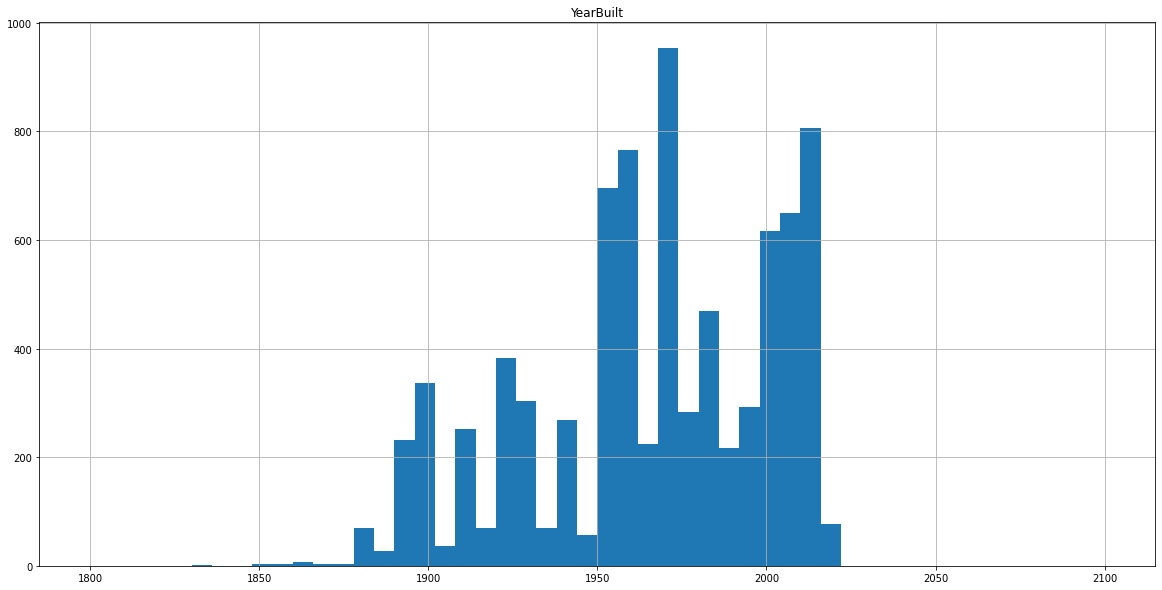

In [114]:
data.hist("YearBuilt" ,range = [1800,2100],bins=50 , figsize=(20,10))

In [115]:
data['YearBuilt'].bfill(inplace=True)


In [116]:
data["CouncilArea"].value_counts().idxmax()

'Moreland'

In [117]:
data["CouncilArea"].replace(np.nan, "Moreland", inplace=True)

In [118]:
data["Postcode"] = data["Postcode"].astype("int")
data["Bedroom2"] = data["Bedroom2"].astype("int")
data["Bathroom"] = data["Bathroom"].astype("int")
data["Car"] = data["Car"].astype("int")
data["Propertycount"] = data["Propertycount"].astype("int")
data['YearBuilt'] = data['YearBuilt'].astype("int")

Plotting all the Graphs to get a better idea of the data

In [119]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [120]:
#Correlation matrix of the dataset
correlation = data.corr()
correlation.style.background_gradient(cmap='coolwarm')

C:\Users\vinay\AppData\Local\Temp\ipykernel_5456\3205681301.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.497656,0.293479,0.055551,0.944021,0.592917,0.408483,0.025609,0.100886,-0.012339,0.016123,0.100427,-0.081394
Price,0.497656,1.000000,-0.161081,0.107371,0.476846,0.467720,0.238979,0.037482,0.077363,-0.230424,-0.212444,0.204093,-0.041673
Distance,0.293479,-0.161081,1.000000,0.433515,0.295296,0.126343,0.262994,0.025209,0.087313,0.219270,-0.132830,0.239363,-0.055744
Postcode,0.055551,0.107371,0.433515,1.000000,0.060825,0.113885,0.050289,0.024899,0.046372,0.035861,-0.406699,0.446873,0.061987
Bedroom2,0.944021,0.476846,0.295296,0.060825,1.000000,0.584657,0.405325,0.025574,0.098345,-0.004144,0.016101,0.101918,-0.081206
Bathroom,0.592917,0.467720,0.126343,0.113885,0.584657,1.000000,0.322246,0.037160,0.090989,0.114836,-0.070666,0.118594,-0.051733
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.074363,0.104499,-0.001963,0.063395,-0.024295
Landsize,0.025609,0.037482,0.025209,0.024899,0.025574,0.037160,0.026770,1.000000,0.092090,0.017761,0.009550,0.010837,-0.006746
BuildingArea,0.100886,0.077363,0.087313,0.046372,0.098345,0.090989,0.074363,0.092090,1.000000,0.011350,0.025799,-0.006234,-0.029277
YearBuilt,-0.012339,-0.230424,0.219270,0.035861,-0.004144,0.114836,0.104499,0.017761,0.011350,1.000000,0.042811,0.005652,0.004590


Price is highly corelated with rooms,Bedroom2 and Bathroom.

<AxesSubplot: xlabel='Rooms', ylabel='Price'>

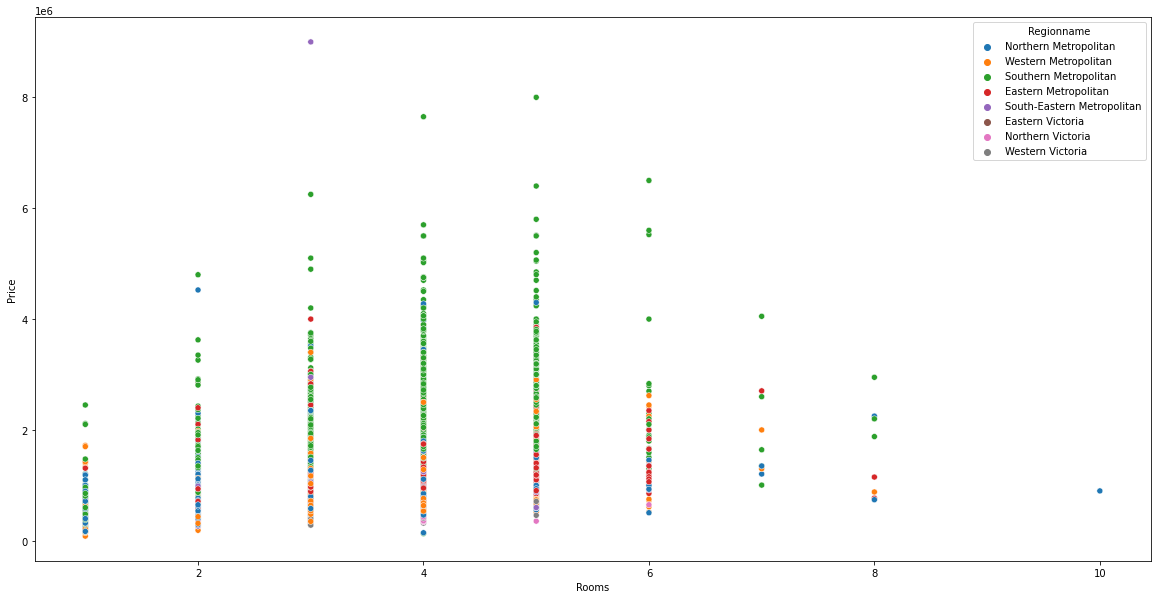

In [121]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = "Rooms",y="Price", hue = "Regionname",data = data)

##### Houses in Southern metropolitan area has more price as compared to other regions regaredless of the number of rooms.Only one house in South-Eastern Metropolitan Area has price exceptionally more than others 

<AxesSubplot: xlabel='Bedroom2', ylabel='Price'>

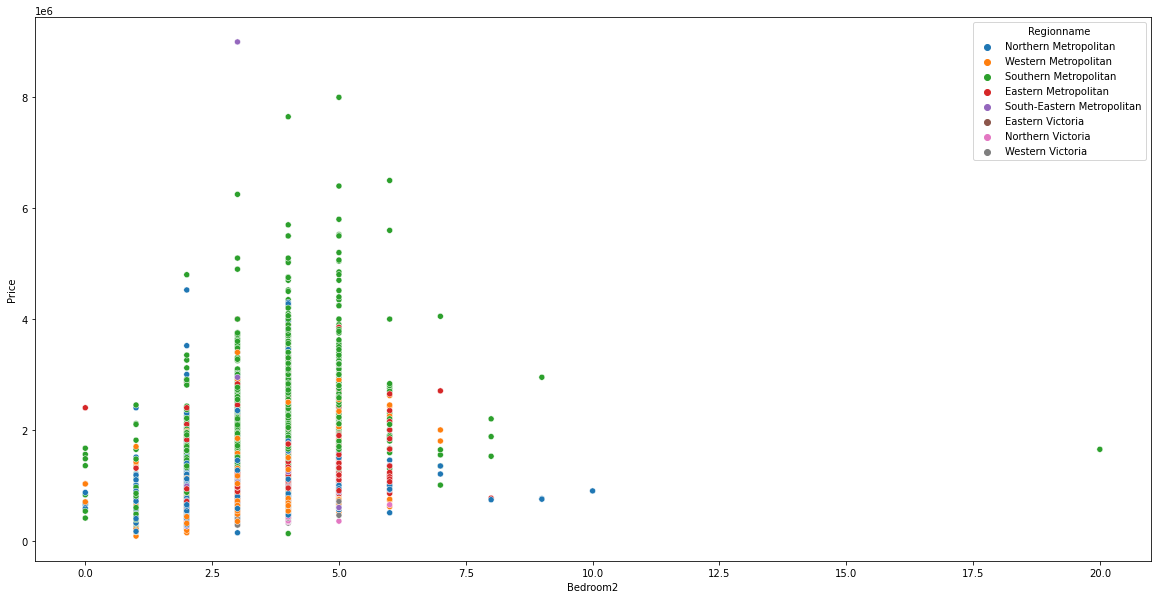

In [122]:
plt.figure(figsize = (20,10))
sns.scatterplot(x= "Bedroom2" ,y = "Price",hue ="Regionname" ,data = data )

In [123]:
fig = px.density_mapbox(data, lat='Lattitude', lon='Longtitude', z='Price', radius=10,center=dict(lat=-37.8, lon=145), zoom=10,mapbox_style="stamen-terrain", opacity = 0.5, title = 'Melbourne Price Heatmap')
fig.show()

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13518 non-null  object 
 1   Address        13518 non-null  object 
 2   Rooms          13518 non-null  int64  
 3   Type           13518 non-null  object 
 4   Price          13518 non-null  float64
 5   Method         13518 non-null  object 
 6   SellerG        13518 non-null  object 
 7   Date           13518 non-null  object 
 8   Distance       13518 non-null  float64
 9   Postcode       13518 non-null  int32  
 10  Bedroom2       13518 non-null  int32  
 11  Bathroom       13518 non-null  int32  
 12  Car            13518 non-null  int32  
 13  Landsize       13518 non-null  float64
 14  BuildingArea   13518 non-null  float64
 15  YearBuilt      13518 non-null  int32  
 16  CouncilArea    13518 non-null  object 
 17  Lattitude      13518 non-null  float64
 18  Longti

In [125]:
c = ["Suburb","Address","Type","Method","SellerG","Date","CouncilArea","Regionname","Postcode","Price","Propertycount"]
data2 = data.drop(c, axis = 1 )
data2

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,2,2.5,2,1,1,202.0,79.0,1900,-37.79960,144.99840
1,2,2.5,2,1,0,156.0,79.0,1900,-37.80790,144.99340
2,3,2.5,3,2,0,134.0,150.0,1900,-37.80930,144.99440
3,3,2.5,3,2,1,94.0,142.0,2014,-37.79690,144.99690
4,4,2.5,3,1,2,120.0,142.0,2014,-37.80720,144.99410
...,...,...,...,...,...,...,...,...,...,...
13575,4,16.7,4,2,2,652.0,133.0,1981,-37.90562,145.16761
13576,3,6.8,3,2,2,333.0,133.0,1995,-37.85927,144.87904
13577,3,6.8,3,2,4,436.0,157.0,1997,-37.85274,144.88738
13578,4,6.8,4,1,5,866.0,157.0,1920,-37.85908,144.89299


In [126]:
price = data["Price"]
price = price.to_numpy().reshape(-1,1)
price


array([[1480000.],
       [1035000.],
       [1465000.],
       ...,
       [1170000.],
       [2500000.],
       [1285000.]])

DOING TRAIN TEST SPLIT ON THE DATA

In [127]:
x = data2
y = price
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state=104, test_size=0.5, shuffle=True)

SCALING THE DATA

In [128]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

## DECISION TREE REGRESSOR 

In [129]:
regressor = DecisionTreeRegressor(random_state = 0) 
reg_train = regressor.fit(X_train, y_train)
reg_train

DecisionTreeRegressor(random_state=0)

#### GETTING THE TRAINING ACCURACY OF DATA IN DECISIONTREE REGRESSOR

In [130]:
X_trainpred = reg_train.predict(X_train)
score = reg_train.score(X_train,y_train)
mse_train = sk.metrics.mean_squared_error(X_trainpred,y_train)  
print("The mean squared error for the training data on decisiontree regressor is :",mse_train)

#Accuracy of the training data
print("The Accuracy of the training data in decisiontree regressor is :",score*100)

The mean squared error for the training data on decisiontree regressor is : 5.576794723208979e-05
The Accuracy of the training data in decisiontree regressor is : 99.99442320527679


#### GETTING THE TESTING ACCUARCY OF DECISION TREE REGRESSOR


In [131]:
reg_test = regressor.fit(X_test,y_test)
X_testPred = reg_test.predict(X_test)
X_testscore = reg_test.score(X_test,y_test)
mse_test = sk.metrics.mean_squared_error(X_testPred,y_test)
print("Mean squared error of test data on decisiontree regressor is  :",mse_test)
print("The accuracy on testing data in decisiontree regressor is  :",X_testscore*100)

Mean squared error of test data on decisiontree regressor is  : 1.1411394315676188e-05
The accuracy on testing data in decisiontree regressor is  : 99.9988054152755


##  LINEAR REGRESSION MODEL

 ##### Fitting the data into linear regression model 

In [132]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr_train = lr.fit(X_train,y_train)
x_trainpred = lr_train.predict(X_train)

In [133]:
lrMse = sk.metrics.mean_squared_error(x_trainpred,y_train)
print("The least square error of the LR model on training data is ",lrMse)
print("The training accuracy of the linear regresison model is :",lr_train.score(X_train,y_train)*100)

The least square error of the LR model on training data is  0.4801949479092388
The training accuracy of the linear regresison model is : 51.980505209076114


##### FITTING THE MODEL BY TESTING DATA AND GETTING THE ACCURAACY

In [148]:
lr_test = lr.fit(X_test,y_test)
X_testpred = lr_test.predict(X_test)
print("The least square error of the LR model on test data is ",sk.metrics.mean_squared_error(X_testpred,y_test))
print("The testing accuracy of the test data is :",lr_test.score(X_test,y_test))

The least square error of the LR model on test data is  0.47038324294307615
The testing accuracy of the test data is : 0.5075863464768724


## 2. PCA

In [135]:
#IMMPORTING PCA FROM SKLEARN LIBRARY
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### AGAIN FITTING THE MODEL AFTER APPLYING PCA TO THE DATA

##### DECISIONTREE REGRESSOR AFTER PCA

In [149]:
#Fitting the model after PCA
reg2 = regressor.fit(X_train_pca , y_train)
score2 = reg2.score(X_train_pca,y_train)
Prediction2 = reg2.predict(X_train_pca)  #prediction on the pca implemented data
mse2 = sk.metrics.mean_squared_error(y_train, Prediction2)
print("The Mean squared error of the training data for the pca implemented data is:",mse2)
print("The score of the model on the training implemented data is : ",score2)

The Mean squared error of the training data for the pca implemented data is: 5.576794723208979e-05
The score of the model on the training implemented data is :  0.999944232052768


##### APPLYING THE DECISION TREE REGRESSOR TO THE TESTING DATA

In [150]:
reg_test_pca = regressor.fit(X_test_pca , y_test)
score_test = reg_test_pca.score(X_test_pca,y_test)
Prediction_test_pca = reg_test_pca.predict(X_train_pca)  #prediction on the pca implemented data
mse_pca_test = sk.metrics.mean_squared_error(Prediction_test_pca,y_test)
print("The Mean squared error of the training data for the pca implemented data is:",mse_pca_test)
print("The score of the model on the training implemented data is : ",score_test)

The Mean squared error of the training data for the pca implemented data is: 1.9785128801286826
The score of the model on the training implemented data is :  0.999988054152755


### LINEAR REGRESSOR AFTER PCA

Fittting the model on pca applied training  data

In [151]:
lr.fit(X_train_pca,y_train)
y_pca_pred = lr.predict(X_train_pca)
lr_pca_mse = sk.metrics.mean_squared_error(y_pca_pred,y_train)
print("The mean square error of the LR model on training data  after PCA is ",lr_pca_mse)
print("The score of the model is : ",lr.score(X_train_pca,y_train))

The mean square error of the LR model on training data  after PCA is  0.4939178291394865
The score of the model is :  0.5060821708605133


Fitting the model in pca applied test data

In [154]:
lr.fit(X_test_pca,y_test)
y_test_pca_pred = lr.predict(X_test_pca)
lr_pcatest_mse = sk.metrics.mean_squared_error(y_test_pca_pred,y_test)
print("The mean square error of the LR model on test data after pca is ",lr_pcatest_mse)
print("The score of the test model is : ",lr.score(X_test_pca,y_test))


The mean square error of the LR model on test data after pca is  0.4877856534291924
The score of the test model is :  0.4893688936739996
